<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_0_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.8_n20.csv',
 'data_multi_delta_-0.8_n30.csv',
 'data_multi_delta_-0.8_n60.csv',
 'data_multi_delta_-0.8_n120.csv',
 'data_multi_delta_-0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,27.140805,53.623805,0.153420,90.918030,90.660993,0.257037
1,0.0,1.0,69.557305,25.246199,-0.440343,104.363161,104.744121,-0.380961
2,0.0,2.0,61.853778,43.812108,-0.025475,115.640411,115.628333,0.012079
3,0.0,3.0,66.839426,76.084252,-0.086810,152.836868,152.970605,-0.133738
4,0.0,4.0,63.936326,38.196080,-0.274301,111.858106,112.087622,-0.229517
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.463707,60.788687,-0.100311,139.152083,139.294555,-0.142472
59996,999.0,56.0,26.042119,75.883389,-0.018625,111.906884,111.927894,-0.021011
59997,999.0,57.0,99.679035,37.123148,0.365756,147.167939,146.869766,0.298173
59998,999.0,58.0,98.490129,40.577015,-0.208804,148.858340,149.134540,-0.276200


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,27.140805,53.623805,0.153420,90.918030,90.660993,0.257037
1,0.0,1.0,69.557305,25.246199,-0.440343,104.363161,104.744121,-0.380961
2,0.0,2.0,61.853778,43.812108,-0.025475,115.640411,115.628333,0.012079
3,0.0,3.0,66.839426,76.084252,-0.086810,152.836868,152.970605,-0.133738
4,0.0,4.0,63.936326,38.196080,-0.274301,111.858106,112.087622,-0.229517
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.463707,60.788687,-0.100311,139.152083,139.294555,-0.142472
59996,999.0,56.0,26.042119,75.883389,-0.018625,111.906884,111.927894,-0.021011
59997,999.0,57.0,99.679035,37.123148,0.365756,147.167939,146.869766,0.298173
59998,999.0,58.0,98.490129,40.577015,-0.208804,148.858340,149.134540,-0.276200


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    27.140805  53.623805  0.153420   90.918030   90.660993  0.257037
      1.0    69.557305  25.246199 -0.440343  104.363161  104.744121 -0.380961
      2.0    61.853778  43.812108 -0.025475  115.640411  115.628333  0.012079
      3.0    66.839426  76.084252 -0.086810  152.836868  152.970605 -0.133738
      4.0    63.936326  38.196080 -0.274301  111.858106  112.087622 -0.229517
...                ...        ...       ...         ...         ...       ...
999.0 55.0   68.463707  60.788687 -0.100311  139.152083  139.294555 -0.142472
      56.0   26.042119  75.883389 -0.018625  111.906884  111.927894 -0.021011
      57.0   99.679035  37.123148  0.365756  147.167939  146.869766  0.298173
      58.0   98.490129  40.577015 -0.208804  148.858340  149.134540 -0.276200
      59.0   77.380861  70.793656  0.142439  158.316955  158.229075  0.087880

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    27.140805  53.623805  0.153420   90.918030   90.660993  0.257037
      1.0    69.557305  25.246199 -0.440343  104.363161  104.744121 -0.380961
      2.0    61.853778  43.812108 -0.025475  115.640411  115.628333  0.012079
      3.0    66.839426  76.084252 -0.086810  152.836868  152.970605 -0.133738
      4.0    63.936326  38.196080 -0.274301  111.858106  112.087622 -0.229517
...                ...        ...       ...         ...         ...       ...
999.0 55.0   68.463707  60.788687 -0.100311  139.152083  139.294555 -0.142472
      56.0   26.042119  75.883389 -0.018625  111.906884  111.927894 -0.021011
      57.0   99.679035  37.123148  0.365756  147.167939  146.869766  0.298173
      58.0   98.490129  40.577015 -0.208804  148.858340  149.134540 -0.276200
      59.0   77.380861  70.793656  0.142439  158.316955  158.229075  0.087880

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,27.140805,53.623805,0.153420,90.918030,90.660993,0.257037
1,0.0,1.0,69.557305,25.246199,-0.440343,104.363161,104.744121,-0.380961
2,0.0,2.0,61.853778,43.812108,-0.025475,115.640411,115.628333,0.012079
3,0.0,3.0,66.839426,76.084252,-0.086810,152.836868,152.970605,-0.133738
4,0.0,4.0,63.936326,38.196080,-0.274301,111.858106,112.087622,-0.229517
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.463707,60.788687,-0.100311,139.152083,139.294555,-0.142472
59996,999.0,56.0,26.042119,75.883389,-0.018625,111.906884,111.927894,-0.021011
59997,999.0,57.0,99.679035,37.123148,0.365756,147.167939,146.869766,0.298173
59998,999.0,58.0,98.490129,40.577015,-0.208804,148.858340,149.134540,-0.276200


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    27.140805  53.623805  0.153420   90.918030   90.660993  0.257037
      1.0    69.557305  25.246199 -0.440343  104.363161  104.744121 -0.380961
      2.0    61.853778  43.812108 -0.025475  115.640411  115.628333  0.012079
      3.0    66.839426  76.084252 -0.086810  152.836868  152.970605 -0.133738
      4.0    63.936326  38.196080 -0.274301  111.858106  112.087622 -0.229517
...                ...        ...       ...         ...         ...       ...
999.0 55.0   68.463707  60.788687 -0.100311  139.152083  139.294555 -0.142472
      56.0   26.042119  75.883389 -0.018625  111.906884  111.927894 -0.021011
      57.0   99.679035  37.123148  0.365756  147.167939  146.869766  0.298173
      58.0   98.490129  40.577015 -0.208804  148.858340  149.134540 -0.276200
      59.0   77.380861  70.793656  0.142439  158.316955  158.229075  0.087880

[60000 rows x 6 columns]

<AxesSubplot:xlabel='x2', ylabel='e'>

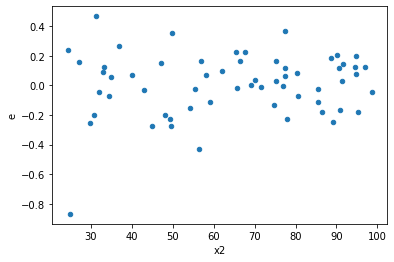

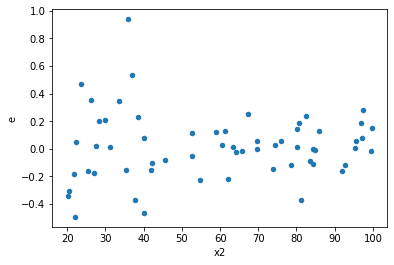

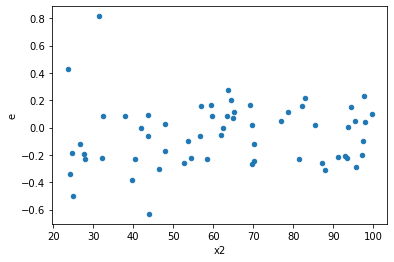

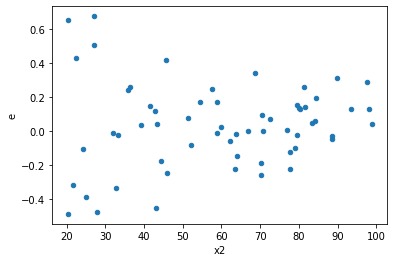

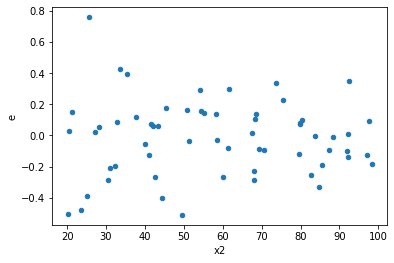

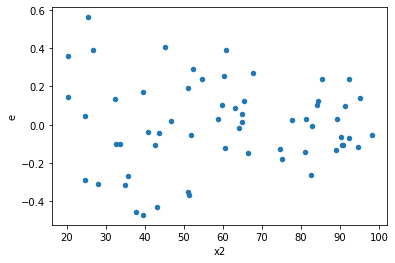

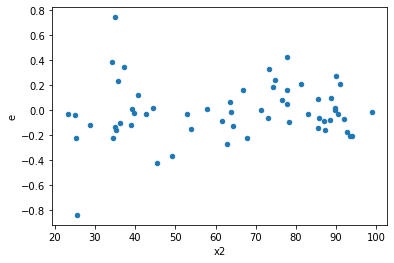

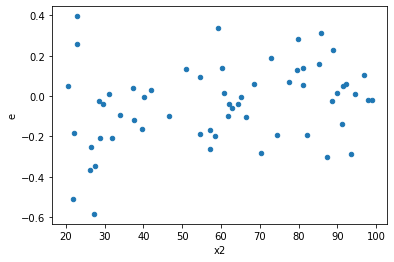

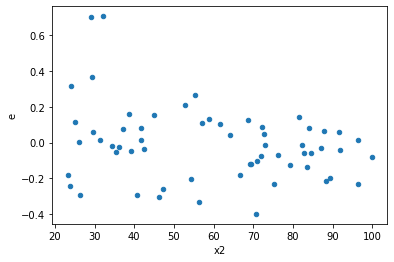

In [12]:
tablenew0 = table.loc[2.0]
tablenew1 = table.loc[18.0]
tablenew2 = table.loc[28.0]
tablenew3 = table.loc[36.0]
tablenew4 = table.loc[45.0]
tablenew5 = table.loc[57.0]
tablenew6 = table.loc[71.0]
tablenew7 = table.loc[78.0]
tablenew8 = table.loc[91.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
6.0,22.0,22.0,0.4349953179036407,0.985650838483916,0.019772514450165486,0.044802310840178,2.265888385268219,0.06128370088931967,0.9693581495553402,0.030641850444659835,Reject001=1 : Homoscedasticity
23.0,22.0,22.0,0.5836420456157818,0.5955497806952204,0.026529183891626448,0.027070444577055472,1.0204024627233206,0.9626478994954901,0.5186760502522549,0.48132394974774506,Reject001=1 : Homoscedasticity
38.0,22.0,22.0,0.7455137914775882,0.8970697809272089,0.03388699052170856,0.04077589913305495,1.2032906583112846,0.6680688377434594,0.6659655811282703,0.3340344188717297,Reject001=1 : Homoscedasticity
39.0,22.0,22.0,0.555745026618341,0.8294311225562473,0.025261137573560955,0.03770141466164761,1.4924670178395691,0.3547334813963827,0.8226332593018086,0.17736674069819136,Reject001=1 : Homoscedasticity
49.0,22.0,22.0,1.062939562213481,1.0986622922932936,0.048315434646067315,0.049939195104240615,1.0336074894092973,0.938906977125304,0.530546511437348,0.469453488562652,Reject001=1 : Homoscedasticity
52.0,22.0,22.0,0.9492990333942057,0.9841545607988724,0.04314995606337299,0.04473429821813057,1.0367171209266286,0.9333675903991674,0.5333162048004163,0.4666837951995837,Reject001=1 : Homoscedasticity
53.0,22.0,22.0,0.9863996696107482,1.1363599976788439,0.04483634861867037,0.05165272716722018,1.152027958532542,0.7428975802289135,0.6285512098855432,0.37144879011445675,Reject001=1 : Homoscedasticity
63.0,22.0,22.0,0.9023709188650152,1.0247205202740899,0.041016859948409784,0.046578205467004086,1.1355868178497637,0.7682033344896073,0.6158983327551963,0.38410166724480366,Reject001=1 : Homoscedasticity
67.0,22.0,22.0,0.5836511630224811,0.7124372262558066,0.026529598319203686,0.03238351028435485,1.220655883844037,0.6441188936286977,0.6779405531856512,0.32205944681434884,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,1.4523634372429572,0.5042212294720727,0.06601651987467988,0.022919146794185122,0.34717290214165897,0.016403435614656393,Reject001=1 : Homoscedasticity
1.0,22.0,22.0,1.7213656498737715,0.7945398781077434,0.07824389317608052,0.03611544900489743,0.4615753068884623,0.07651535783434668,Reject001=1 : Homoscedasticity
2.0,22.0,22.0,1.5666588436692226,0.4199766160315107,0.0712117656213283,0.01908984618325049,0.2680715190346717,0.0031456443224143365,Reject001=0 : Heteroscedasticity
3.0,22.0,22.0,1.453690124637706,0.5564906839316949,0.06607682384716845,0.02529503108780431,0.3828124539749388,0.028797702476258916,Reject001=1 : Homoscedasticity
4.0,22.0,22.0,1.5337774368606258,0.777850627898403,0.06971715622093753,0.03535684672265468,0.5071470013866727,0.11882253363459354,Reject001=1 : Homoscedasticity
5.0,22.0,22.0,1.449008414184769,0.6526930305433402,0.06586401882658041,0.02966786502469728,0.4504411597296029,0.06787270457159444,Reject001=1 : Homoscedasticity
6.0,22.0,22.0,0.4349953179036407,0.985650838483916,0.019772514450165486,0.044802310840178,2.265888385268219,0.06128370088931967,Reject001=1 : Homoscedasticity
7.0,22.0,22.0,1.2090600869225623,0.750330843740677,0.054957276678298285,0.03410594744275805,0.6205902021383444,0.270851197993297,Reject001=1 : Homoscedasticity
8.0,22.0,22.0,1.0205556345668954,0.4751183027334027,0.04638889248031342,0.021596286487881942,0.4655486547139922,0.0797590509769088,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      905
Reject001=0 : Heteroscedasticity     95
Name: Result_test, dtype: int64